# Linear Regression Assignment 



#### Important - Libraries and Versions 
Python: 3.13.5 
NumPy: 2.3.2
Pandas: 2.3.1
Matplotlib: 3.10.5
Seaborn: 0.13.2
Scikit-learn: 1.7.2
Statsmodels: 0.14.5
SciPy: 1.16.1


## Steps
### Data load and exploration
### Data cleaning
### Data Analysis
### Model Building
### Model Evaluation

In [5]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression



## 1. Load file and explore data

In [6]:
# Read the file
inp0 = pd.read_csv('day.csv')

In [7]:
# Check the data, check shape
inp0.shape  

(730, 16)

In [8]:
# check first 10 records
inp0.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
#check all columns
inp0.columns    

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# check values and type
inp0.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
2        02-01-2018  1       0   1     0        0        0           2           14.902598  17.68695  69.6087  16.652113  131     670         801     1
3        03-01-2018  1       0   1     0        1        1           1           8.050924   9.47025   43.7273  16.636703  120     1229        1349    1
4        04-01-2018  1       0   1     0        2        1           1           8.200000   10.60610  59.0435  10.739832  108     1454        1562    1
5        05-01-2018  1       0   1     0        3        1           1           9.305237   11.46350  43.6957  12.522300  82      1518        1600    1
                                                                                             

In [11]:
# check statistics
inp0.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Data cleaning

In [12]:
# looks like instant is just a row id, lets drop it
inp1 = inp0.copy()
inp1.drop(columns=['instant'], inplace= True)

In [13]:
# are there any null values?
inp1.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [15]:
# lets check the unique values of date and see if it helps?
inp1.dteday.unique()

array(['01-01-2018', '02-01-2018', '03-01-2018', '04-01-2018',
       '05-01-2018', '06-01-2018', '07-01-2018', '08-01-2018',
       '09-01-2018', '10-01-2018', '11-01-2018', '12-01-2018',
       '13-01-2018', '14-01-2018', '15-01-2018', '16-01-2018',
       '17-01-2018', '18-01-2018', '19-01-2018', '20-01-2018',
       '21-01-2018', '22-01-2018', '23-01-2018', '24-01-2018',
       '25-01-2018', '26-01-2018', '27-01-2018', '28-01-2018',
       '29-01-2018', '30-01-2018', '31-01-2018', '01-02-2018',
       '02-02-2018', '03-02-2018', '04-02-2018', '05-02-2018',
       '06-02-2018', '07-02-2018', '08-02-2018', '09-02-2018',
       '10-02-2018', '11-02-2018', '12-02-2018', '13-02-2018',
       '14-02-2018', '15-02-2018', '16-02-2018', '17-02-2018',
       '18-02-2018', '19-02-2018', '20-02-2018', '21-02-2018',
       '22-02-2018', '23-02-2018', '24-02-2018', '25-02-2018',
       '26-02-2018', '27-02-2018', '28-02-2018', '01-03-2018',
       '02-03-2018', '03-03-2018', '04-03-2018', '05-03

In [16]:
## we already have year month columns, so we can drop date column
inp1 = inp1.drop('dteday', axis=1)

In [17]:
# lets rename some columns as per dictionary provided
inp1.rename(columns={'yr':'year', 'mnth':'month', 'hr':'hour', 'weathersit':'weather_situation', 'atemp':'apparent_temp', 'hum':'humidity', 'cnt':'count'}, inplace=True)

## 3. Data analysis, Visual representation


In [18]:
## create separate data set for numeric and catagorcial columns
num_cols = ['temp', 'apparent_temp', 'humidity', 'windspeed', 'count', 'casual', 'registered']
cat_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_situation','count']

inp_num = inp1[num_cols]
inp_cat = inp1[cat_cols]

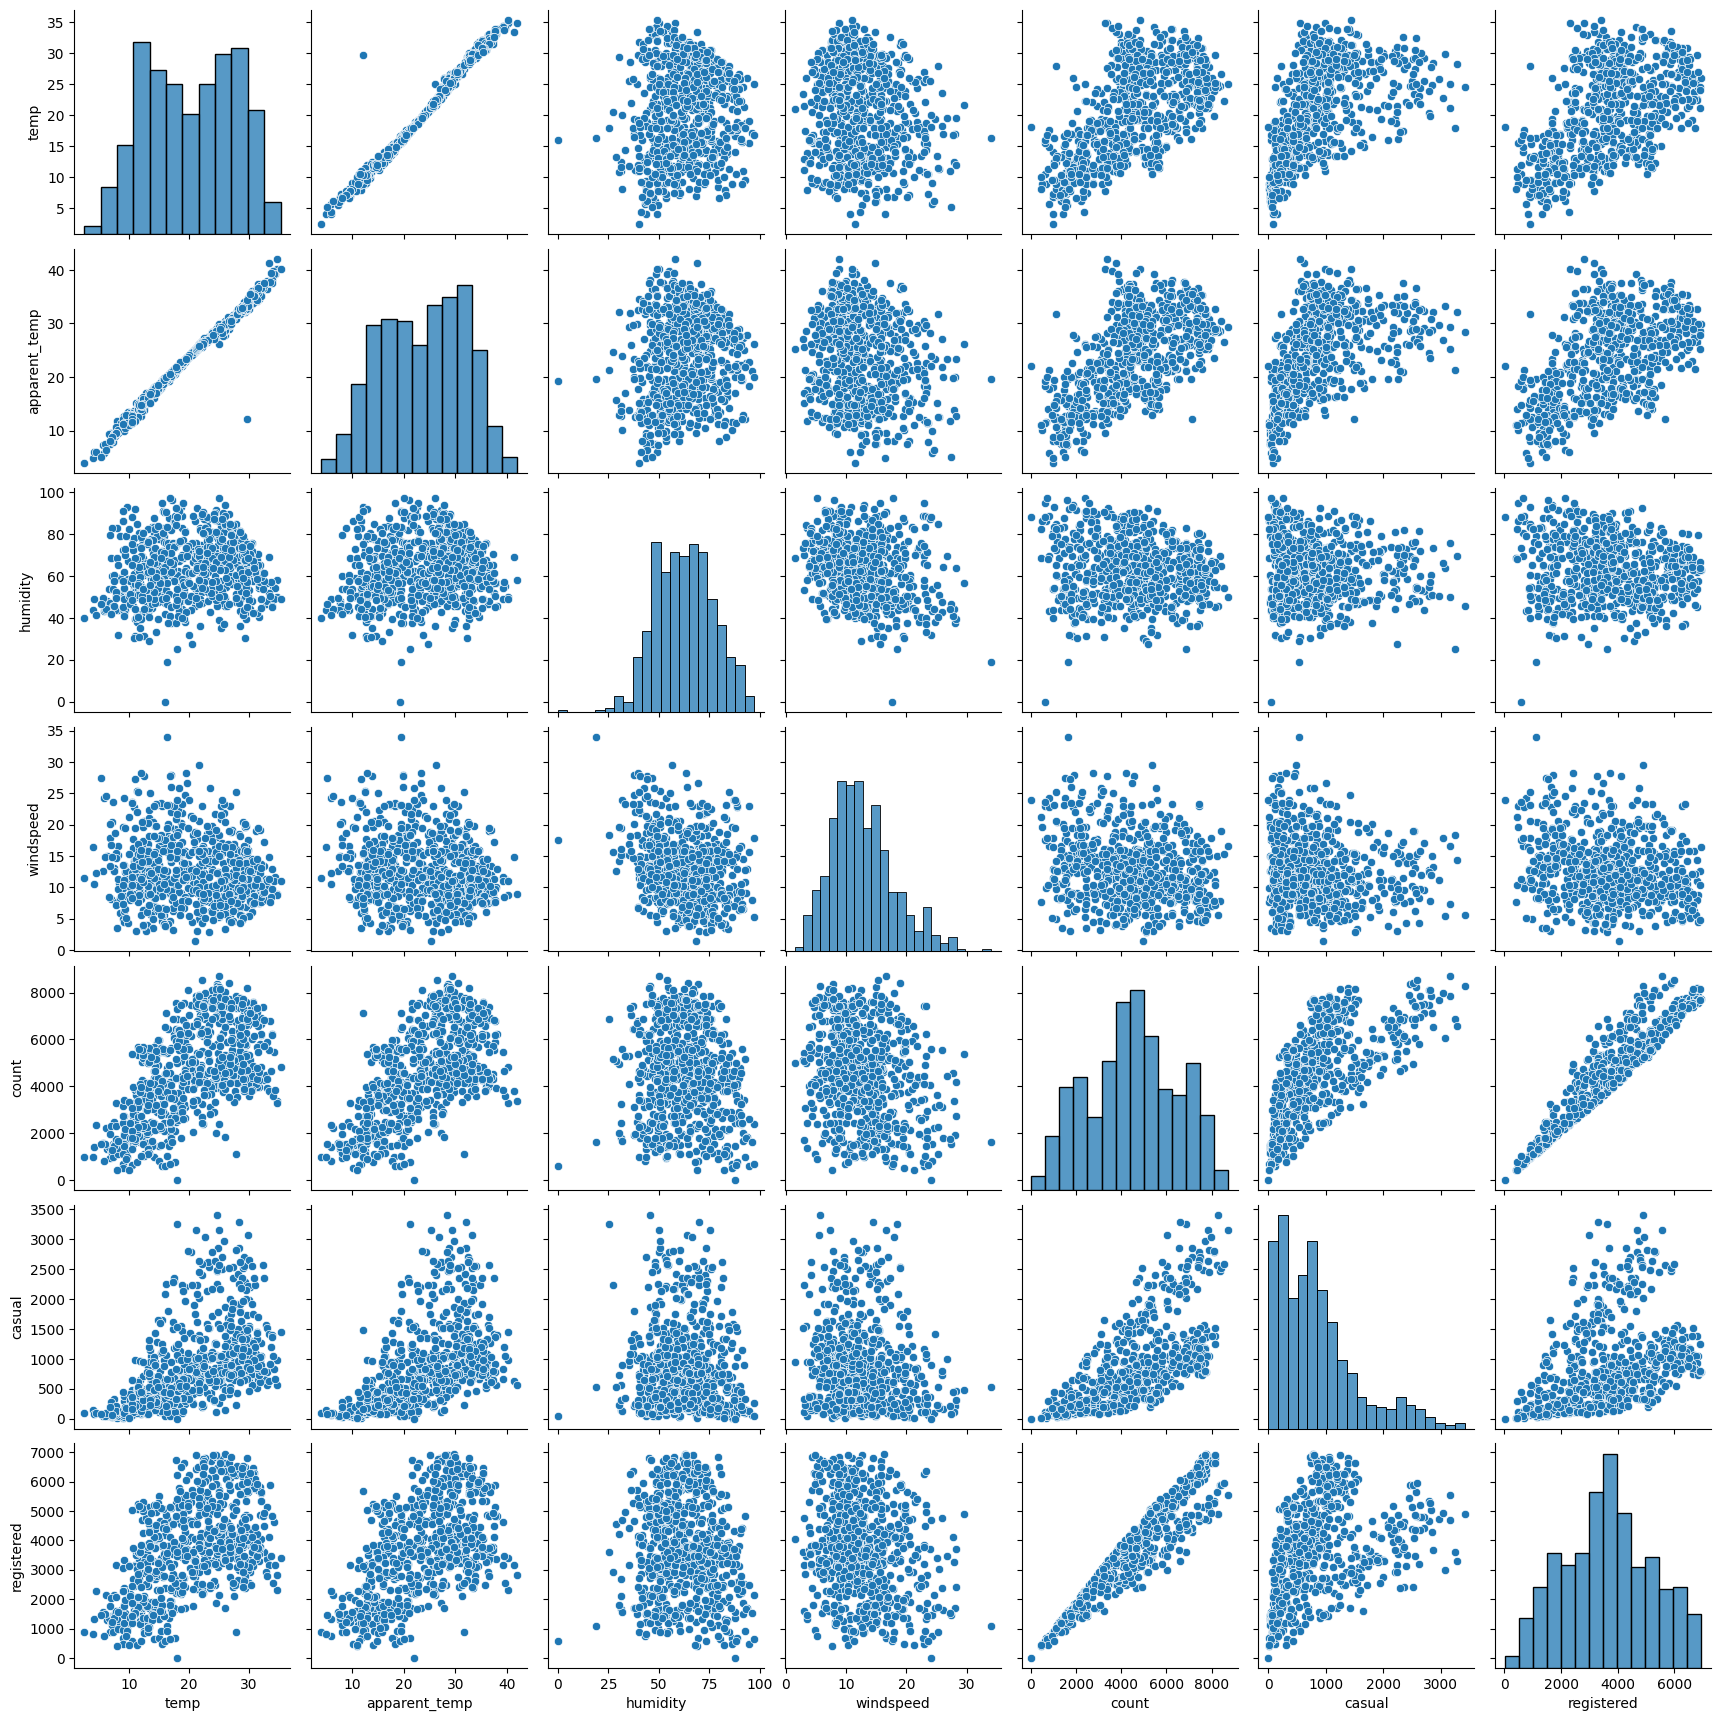

In [19]:
## visiualize numeric data
sns.pairplot(inp_num)   
plt.show()

##### Observation - 
##### 1. We see a very high correlation between registered and casual with count. Need to check this. As oer "ReadMe" file , count appears to be the sum of registered and casual
##### 2. We see very high correlation with apperant temp and temp, which is quite obvious, we will drop one of this column as it might increase collinearity later

In [20]:
# Drop apparent_temp 
inp1.drop(columns=['apparent_temp'], inplace=True)
inp_num.drop(columns=['apparent_temp'], inplace=True)

C:\Users\I349101\AppData\Local\Temp\ipykernel_32848\2001155797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp_num.drop(columns=['apparent_temp'], inplace=True)


In [21]:
## check the registred and count column relation
inp2 = inp1.copy()
inp2['calc_count'] = inp2['casual'] + inp2['registered']

In [22]:
## now check the values of calc_count and count
inp2[['calc_count', 'count']].head(10)

,calc_count,count
0,985,985
1,801,801
2,1349,1349
3,1562,1562
4,1600,1600
5,1606,1606
6,1510,1510
7,959,959
8,822,822
9,1321,1321


In [23]:
## they appear to be same, lets drop casual and registered columns as they are given by count,
## which is our target variable, else it will introduce Multicollinearity 
inp1.drop(columns=['casual', 'registered'], inplace=True)
inp_num.drop(columns=['casual', 'registered'], inplace=True)

C:\Users\I349101\AppData\Local\Temp\ipykernel_32848\3841198110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp_num.drop(columns=['casual', 'registered'], inplace=True)


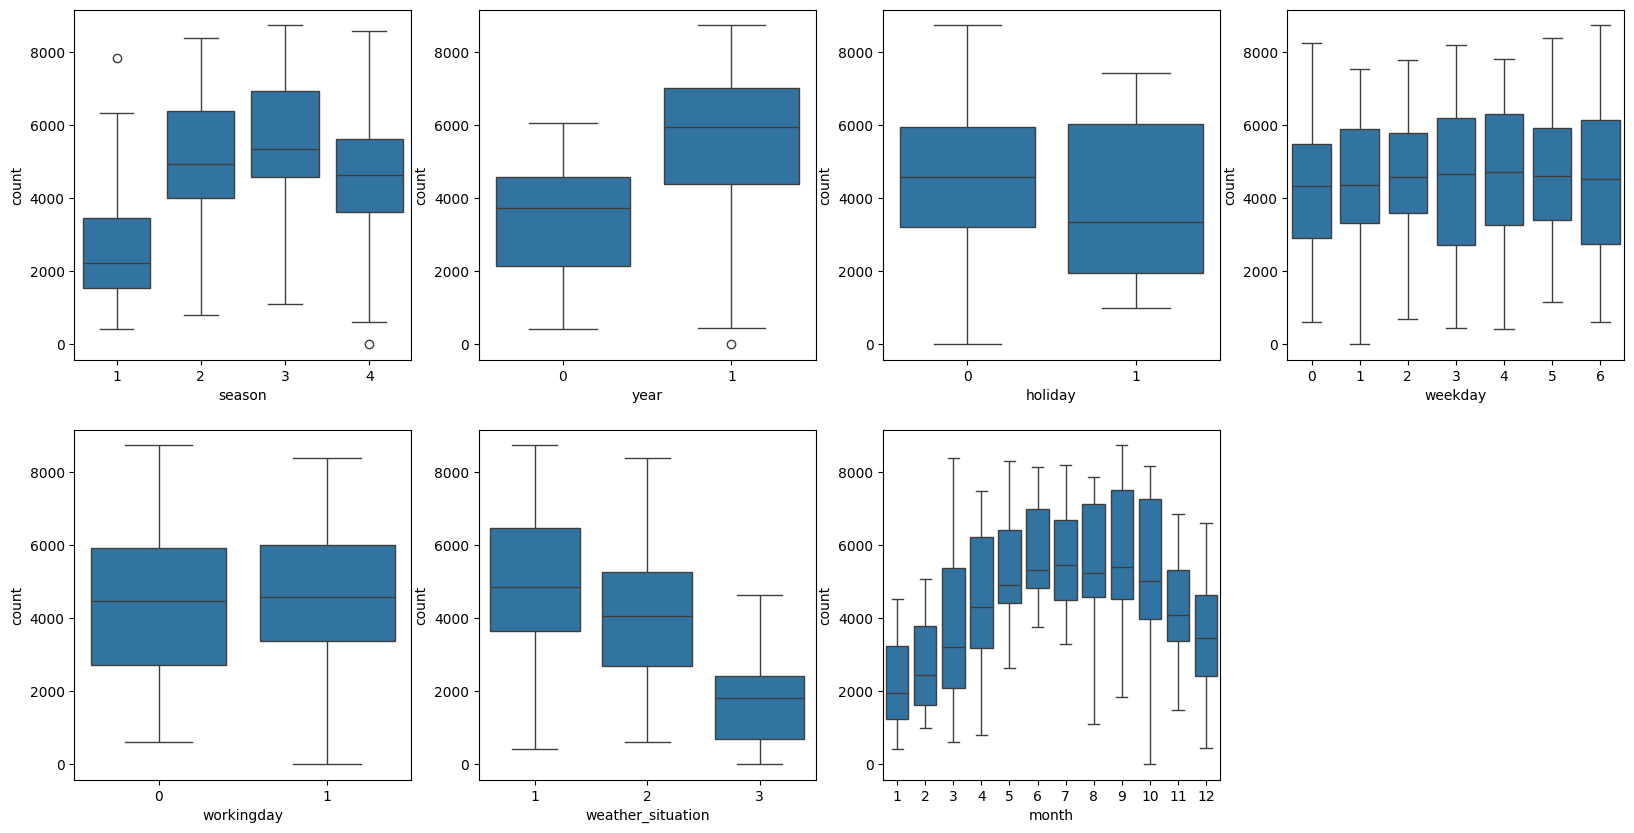

In [24]:
## visualize categorical data using box plots subplots
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='count', data = inp_cat)
plt.subplot(2,4,2)
sns.boxplot(x='year', y='count', data = inp_cat)
plt.subplot(2,4,3)
sns.boxplot(x='holiday', y='count', data = inp_cat)
plt.subplot(2,4,4)
sns.boxplot(x='weekday', y='count', data = inp_cat)
plt.subplot(2,4,5)
sns.boxplot(x='workingday', y='count', data = inp_cat)
plt.subplot(2,4,6)
sns.boxplot(x='weather_situation', y='count', data = inp_cat)
plt.subplot(2,4,7)
sns.boxplot(x='month', y='count', data = inp_cat)
plt.show()



##### Observarion
##### 1. Season , year, month and weather situation seems to be highly corelated to Count
##### 2. Weekday and working day are not impacting count in a visible way

## 4 Model Buidling

In [25]:
## We need to define a function to rename dummy variable columns as all values are like 1,2,3
def create_dummies(df, col_name):
    dum_col_df = pd.get_dummies(inp1[col_name],drop_first=True, dtype=int, prefix=col_name)
    df_ret = pd.concat([df, dum_col_df], axis= 1)
    df_ret.drop(col_name, axis=1, inplace=True)
    return df_ret

In [26]:
## lets create dummy variables for categorical columns and drop original columns
inp1 = create_dummies(inp1,'season')
inp1 = create_dummies(inp1,'weekday')
inp1 = create_dummies(inp1,'month')
inp1 = create_dummies(inp1,'weather_situation')


In [27]:
## check final columns
inp1.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'count', 'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weather_situation_2',
       'weather_situation_3'],
      dtype='object')

In [28]:
## check the data in final input
inp_final = inp1.copy()
inp_final.head(10)

,year,holiday,workingday,temp,humidity,windspeed,count,season_2,season_3,season_4,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_situation_2,weather_situation_3
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
## now lets do a test-train split
from sklearn.model_selection import train_test_split
inp_final_train, inp_final_test = train_test_split(inp_final, test_size=0.2, random_state=80)

In [30]:
## Lets check the test and train splits
inp_final_train.shape, inp_final_test.shape

((584, 29), (146, 29))

In [31]:
inp_final_test.head(10)

,year,holiday,workingday,temp,humidity,windspeed,count,season_2,season_3,season_4,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_situation_2,weather_situation_3
254,0,0,1,26.418268,69.2174,5.957171,4713,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,0,0,1,9.771653,67.0833,4.251150,3310,0,0,1,...,0,0,0,0,0,0,0,1,0,0
144,0,0,1,27.094153,69.6250,10.333611,4978,1,0,0,...,1,0,0,0,0,0,0,0,0,0
423,1,0,1,14.725847,39.5833,12.958939,4363,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,0,0,1,26.205847,54.8333,8.375536,5204,0,1,0,...,0,0,0,1,0,0,0,0,0,0
218,0,0,0,30.442500,75.2917,13.499629,3785,0,1,0,...,0,0,0,1,0,0,0,0,0,0
445,1,0,1,22.720847,83.1250,7.876654,6871,1,0,0,...,0,0,0,0,0,0,0,0,0,0
290,0,0,1,21.832500,70.1667,7.375829,4748,0,0,1,...,0,0,0,0,0,1,0,0,1,0
700,1,0,0,14.247500,82.3333,8.333393,4649,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [32]:
inp_final_train.head(10)

,year,holiday,workingday,temp,humidity,windspeed,count,season_2,season_3,season_4,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_situation_2,weather_situation_3
100,0,0,1,24.421732,71.6956,21.739758,3348,1,0,0,...,0,0,0,0,0,0,0,0,1,0
261,0,0,1,22.515847,69.0000,10.166714,4539,0,1,0,...,0,0,0,0,1,0,0,0,1,0
309,0,0,0,14.281653,73.4583,6.167631,3649,0,0,1,...,0,0,0,0,0,0,1,0,0,0
725,1,0,1,10.420847,65.2917,23.458911,2114,0,0,0,...,0,0,0,0,0,0,0,1,1,0
57,0,0,0,14.082598,68.0000,8.391616,2402,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,12.977402,45.7391,17.479161,1589,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0,0,1,25.317500,70.0833,21.500836,4058,1,0,0,...,0,0,0,0,0,0,0,0,1,0
336,0,0,0,12.265847,61.2917,6.417481,3614,0,0,1,...,0,0,0,0,0,0,0,1,0,0
613,1,0,1,28.563347,81.0417,9.542207,6203,0,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Rescaling the features

In [33]:
## # Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [34]:

## build new col list for numeric columns as some of the fields are not there now
num_cols2 = ['temp', 'humidity', 'windspeed', 'count', ]
inp_final_train[num_cols2] = scaler.fit_transform(inp_final_train[num_cols2])

In [35]:
## check the transformed values
inp_final_train.head(10)

,year,holiday,workingday,temp,humidity,windspeed,count,season_2,season_3,season_4,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_situation_2,weather_situation_3
100,0,0,1,0.652334,0.737230,0.622759,0.382651,1,0,0,...,0,0,0,0,0,0,0,0,1,0
261,0,0,1,0.591581,0.709512,0.266662,0.519673,0,1,0,...,0,0,0,0,1,0,0,0,1,0
309,0,0,0,0.329103,0.755355,0.143613,0.417280,0,0,1,...,0,0,0,0,0,0,1,0,0,0
725,1,0,1,0.206033,0.671380,0.675656,0.240681,0,0,0,...,0,0,0,0,0,0,0,1,1,0
57,0,0,0,0.322757,0.699229,0.212044,0.273815,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0.287527,0.470325,0.491662,0.180281,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0,0,1,0.680888,0.720651,0.615407,0.464335,1,0,0,...,0,0,0,0,0,0,0,0,1,0
336,0,0,0,0.264846,0.630249,0.151301,0.413254,0,0,1,...,0,0,0,0,0,0,0,1,0,0
613,1,0,1,0.784355,0.833334,0.247447,0.711114,0,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.208211,0.497001,0.676936,0.204096,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
## extract X and y from train dataset
X_train = inp_final_train.drop('count', axis=1)
y_train = inp_final_train['count']

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [37]:
# import RFE
from sklearn.feature_selection import RFE

In [38]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
# print the boolean mask indicating selected features and their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(10)),
 ('temp', np.True_, np.int64(1)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_2', np.True_, np.int64(1)),
 ('season_3', np.False_, np.int64(3)),
 ('season_4', np.True_, np.int64(1)),
 ('weekday_1', np.False_, np.int64(12)),
 ('weekday_2', np.False_, np.int64(13)),
 ('weekday_3', np.False_, np.int64(16)),
 ('weekday_4', np.False_, np.int64(19)),
 ('weekday_5', np.False_, np.int64(15)),
 ('weekday_6', np.False_, np.int64(9)),
 ('month_2', np.False_, np.int64(11)),
 ('month_3', np.False_, np.int64(5)),
 ('month_4', np.False_, np.int64(6)),
 ('month_5', np.False_, np.int64(4)),
 ('month_6', np.False_, np.int64(7)),
 ('month_7', np.False_, np.int64(14)),
 ('month_8', np.False_, np.int64(2)),
 ('month_9', np.True_, np.int64(1)),
 ('month_10', np.True_, np.int64(1)),
 ('month_11', np.False_, np.int64(17)),
 ('month_12', np.False_, np.int64

In [40]:
#### lets drop the extra columns and proceed with 10
X_train2 = X_train.copy()
X_train2 = X_train2[X_train2.columns[rfe.support_]]

In [41]:
## lets check Model details using statsmodel
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train2)  # adding a constant
lm_sm = sm.OLS(y_train, X_train2).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     252.8
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          9.89e-203
Time:                        17:50:34   Log-Likelihood:                 545.10
No. Observations:                 584   AIC:                            -1068.
Df Residuals:                     573   BIC:                            -1020.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3082    

### Observations 
#### P value are all 0 and R sqare looks good 84%, lets check VIF


In [42]:
## calculate VIFs for the features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train2 = X_train2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,9.51
2,temp,6.04
4,windspeed,4.18
6,season_4,2.16
0,year,1.95
8,month_10,1.61
5,season_2,1.59
7,month_9,1.22
9,weather_situation_3,1.10
1,holiday,1.04


#### Observation - VIF is very high for Humidy and temp, lets drop one by one


In [43]:
## Lets drop humidity column and check again
X_train3 = X_train2.drop(['humidity'], axis=1)  

In [44]:
## Lets build model again
X_train3 = sm.add_constant(X_train3)  # adding a constant
lm_sm2 = sm.OLS(y_train, X_train3).fit()
print(lm_sm2.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     236.3
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          1.46e-186
Time:                        17:50:34   Log-Likelihood:                 504.19
No. Observations:                 584   AIC:                            -988.4
Df Residuals:                     574   BIC:                            -944.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1152    

In [45]:
## R squared value is 0.84, all p values are significant lets check VIF again
#X_train3 = X_train3.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train3.drop(['const'], axis=1) 
vif['Features'] = X.columns  
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,3.56
3,windspeed,3.24
0,year,1.93
5,season_4,1.88
7,month_10,1.61
4,season_2,1.56
6,month_9,1.20
8,weather_situation_3,1.08
1,holiday,1.04


#### Observation - All VIFs are under 5 however month_10 t value is > 0.05

In [46]:
## lets drop month_10 as its p value is > 0.05
X_train4 = X_train3.drop(['month_10'], axis=1)


In [47]:
## Lets build model again
X_train4 = sm.add_constant(X_train4)  # adding a constant
lm_sm4 = sm.OLS(y_train, X_train4).fit()
print(lm_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     264.2
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          4.98e-187
Time:                        17:50:34   Log-Likelihood:                 502.41
No. Observations:                 584   AIC:                            -986.8
Df Residuals:                     575   BIC:                            -947.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1115    

In [48]:
## All p values look good now, lets recheck VIFs
vif = pd.DataFrame()
X = X_train4.drop(['const'], axis=1) 
vif['Features'] = X.columns  
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.50
3,windspeed,3.23
0,year,1.92
4,season_2,1.56
5,season_4,1.36
6,month_9,1.18
7,weather_situation_3,1.07
1,holiday,1.04


#### Observation - All VIFs are under 5 and all p values under 0.05

In [49]:
## Now lets check the residuals to see if they are normally distributed
y_train_pred = lm_sm4.predict(X_train4)
residuals = y_train - y_train_pred

Text(0.5, 0, 'Errors')

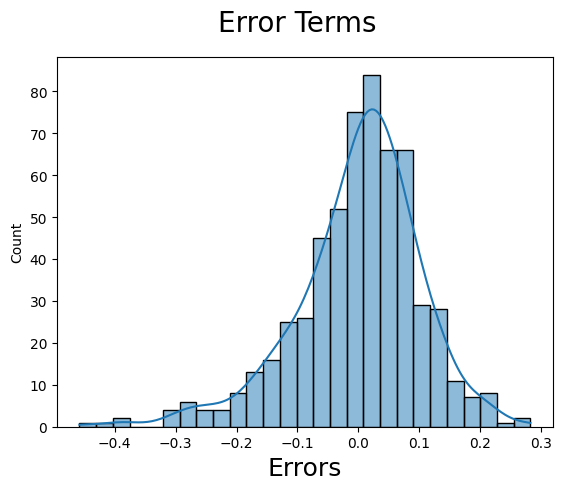

In [50]:
## now plot the residuals
fig = plt.figure()
sns.histplot(residuals, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation - Error terms seems to be normally distributed, Now lets predict with test set

### Predict on test set

In [51]:
## Scale test data
inp_final_test[num_cols2] = scaler.transform(inp_final_test[num_cols2])


In [52]:
## Divide into X and y
X_test = inp_final_test.drop('count', axis=1)
y_test = inp_final_test['count']    

In [53]:
## keep only the columns used in train set
X_test2 = X_test[X_train4.columns.drop('const')]

In [54]:
## Add constant to test set
X_test2 = sm.add_constant(X_test2)

In [55]:
## Predict on test set
y_test_pred = lm_sm4.predict(X_test2)

#### Model Evaluation   

In [56]:
## calculate residuals for test set
residuals_test = y_test - y_test_pred


Text(0.5, 0, 'Errors')

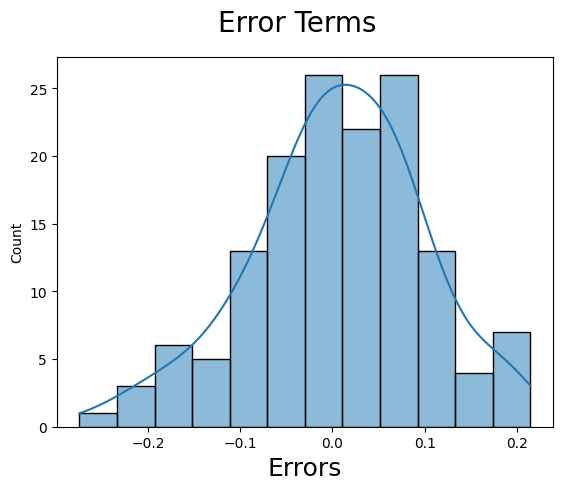

In [57]:
## Plot error terms for test set
fig = plt.figure()
sns.histplot(residuals_test, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

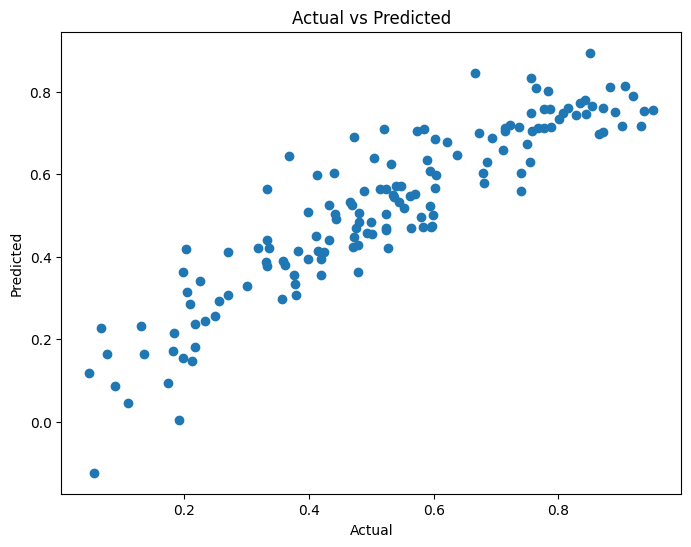

In [58]:
## Plotting y_test and y_test_pred to visualize the fit 
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

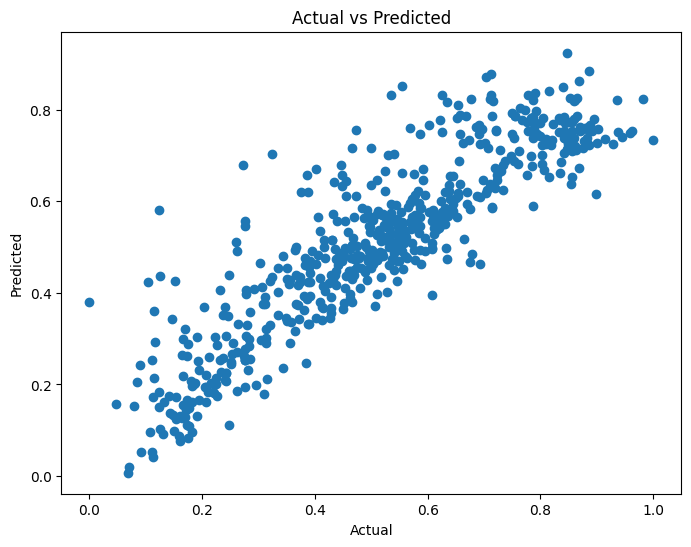

In [59]:
## Plotting y_train and y_train_pred to visualize the fit 
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#### Model Evaluation using R2 Score

In [60]:
from sklearn.metrics import r2_score

#### Model Evaluation using R2 Score (Test Set)
r2_score(y_test, y_test_pred)

0.8279594793342986

In [61]:
### Model Evaluation using R2 Score (Train Set)
r2_score(y_train, y_train_pred)

0.7861571183729847